In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [45]:
X = torch.tensor([i for i in range(-50, 50)]).float()

In [46]:
def randvec(r1, r2, shape):
    return (r1 - r2) * torch.rand(shape) + r2

In [47]:
y = randvec(-500, 500, X.shape) + X + X.pow(2)

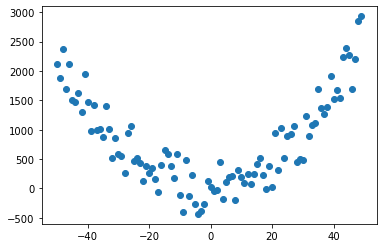

In [48]:
plt.scatter(X, y)

In [49]:
def mse(y_true, y_pred):
    e = y_true - y_pred
    return e.T.mm(e) / y_true.shape[0]

In [50]:
def create_features(X, degree=2):
    features = []
    for i in range(0, degree):
        if i != 0:
            X_d = X.pow(i + 1)
        else:
            X_d = X.clone()
        X_d -= X_d.mean()
        std = X_d.std()
        
        if std != 0:
            X_d /= std
            
        if len(X_d.shape) == 1:
            X_d = X_d.unsqueeze(1)
            
        if i == 0:
            ones_col = torch.ones((X_d.shape[0], 1), dtype=torch.float32)
            X_d = torch.cat([ones_col, X_d], axis=1)
        features.append(X_d)
    return features

In [51]:
features = create_features(X)

In [52]:
def get_weights_col(X):
    #return torch.normal(torch.zeros(X.shape[1]), torch.ones(X.shape[1])).unsqueeze(1)
    return torch.ones(X.shape[1], 1)

#def create_weights(features, degree):
#    weights = []
#    for i in range(degree):
#        weights.append(get_weights_col(features[i]))
#    return weights

In [53]:
#weights = create_weights(features, 2)

In [54]:
def predict(features, weights):
    pred = 0
    for i in range(len(features)):
        pred += features[i].mm(weights[i])
    return pred

In [55]:
y_true = y.unsqueeze(1)

In [56]:
def normal_equation(y_true, features):
    weights = []
    for i in range(len(features)):
        X = features[i]
        XTX_inv = (X.T.mm(X)).inverse()
        XTy = X.T.mm(y_true)
        w = XTX_inv.mm(XTy)
        weights.append(w)
    return weights

In [57]:
weights = normal_equation(y_true, features)

In [58]:
y_pred = predict(features, weights)

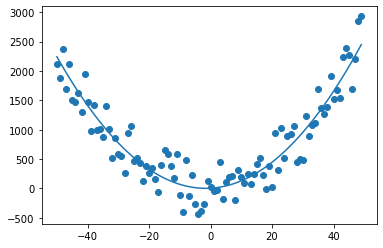

In [59]:
plt.scatter(X,y)
plt.plot(X, y_pred, )